In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

In [2]:

dataset = pd.read_csv('Mall_Customers.csv')
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:

# Select features
X = dataset.iloc[:, 3:5].values


In [4]:

# Define parameters
min_samples = 5
eps = 0.9 


In [5]:

# Create OPTICS object
n = NearestNeighbors(n_neighbors=min_samples + 1).fit(X)
dbscan = OPTICS(min_samples=min_samples, eps=eps, metric='minkowski', p=2)
labels = dbscan.fit_predict(X)


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\li

In [6]:
core_samples = np.zeros_like(labels, dtype=bool)
for i in range(len(labels)):
    # Use the defined eps value instead of dbscan.eps_
    if dbscan.reachability_[i] < eps and dbscan.core_samples_[i]:
        core_samples[i] = True


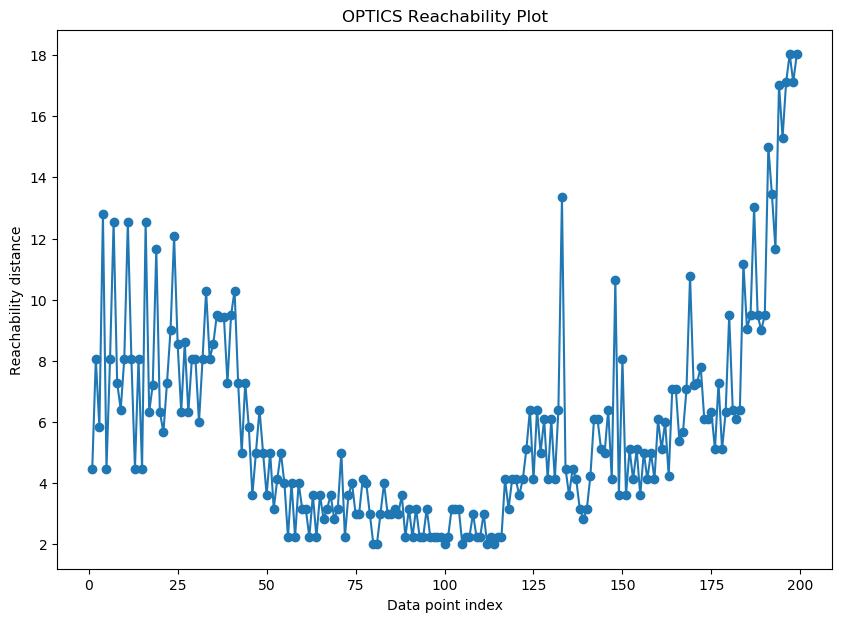

In [7]:
# Plot reachability plot
reachable_plot = dbscan.reachability_
plt.figure(figsize=(10, 7))
plt.plot(reachable_plot, '-o')
plt.xlabel("Data point index")
plt.ylabel("Reachability distance")
plt.title("OPTICS Reachability Plot")
plt.show()

In [8]:
# Identify clusters based on reachability and density
cluster_ids = {}
cluster_count = 0
for i in range(len(labels)):
    if labels[i] != -1:
        if labels[i] not in cluster_ids:
            cluster_count += 1
            cluster_ids[labels[i]] = cluster_count
        labels[i] = cluster_ids[labels[i]]

In [9]:
# Add cluster labels to the dataset
supervised = dataset
supervised['Cluster_group'] = labels

In [10]:

# Export results
supervised.to_csv("ML_cluster_OPTICS.csv", index=False)


In [11]:

# Print cluster centers (not applicable for OPTICS)
# print("Cluster centers: not applicable for OPTICS")

# Print labels
print("Cluster labels:", labels)


Cluster labels: [-1  1  2  1 -1  1  2 -1  2  1  2 -1  2  1  2  1  3  1  3 -1  3  1  2  1
  2 -1  3 -1  3 -1  2  1  2 -1  2 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  4 -1
 -1 -1  4 -1  4 -1  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 -1
  4  4 -1  5  5 -1  5 -1  5  5 -1 -1  5 -1 -1  5 -1  6 -1  7  6  7  7 -1
  6  6  7  6  7  6 -1 -1 -1  7  6  6  7  6  6 -1  7  6  6  6  7 -1 -1 -1
 -1 -1 -1  8 -1  9 -1  8 -1  9 10  9 -1  9 10  8 10  9 10  9 10  8 -1  8
 -1  8 -1  9 -1  8 -1  8 -1  9 -1  8 10  9 10  9 -1  9 10  8 11 -1 11  8
 11 -1 11 -1 11  8 11  8 11 -1 11 -1 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


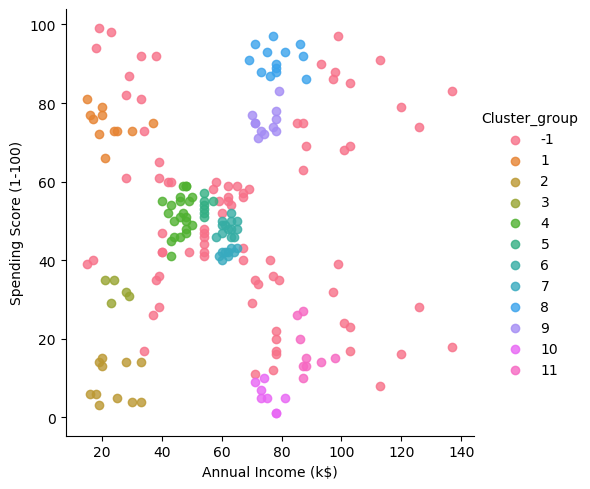

In [12]:

# Visualize clusters (similar to K-means)
import seaborn as sns
sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue='Cluster_group',
           fit_reg=False, legend=True, legend_out=True)
plt.show()